In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
from wordcloud import WordCloud


Cargo los dataframes

In [5]:
df_games = pd.read_parquet(r'D:\projectos\programacion\henrry\bootcamp\proyecto_individuales\1\p1\Proyecto_Individual_N-1_kalchichen_lucas\dataset\ETL_dataset\steam_games_clean.parquet')
df_items = pd.read_parquet(r'D:\projectos\programacion\henrry\bootcamp\proyecto_individuales\1\p1\Proyecto_Individual_N-1_kalchichen_lucas\dataset\ETL_dataset\user_items_cleaned.parquet')
df_reviews = pd.read_parquet(r'D:\projectos\programacion\henrry\bootcamp\proyecto_individuales\1\p1\Proyecto_Individual_N-1_kalchichen_lucas\dataset\ETL_dataset\users_reviews_cleaned.parquet')

Hago una Visualizacion de las descripciones de los dataframes

In [11]:
df_games.describe(include='all') 

,genres,name,tags,specs,price,item_id,developer,year
count,31995,32132,31971,31464,32133.00000,3.213300e+04,28835,32133.000000
unique,3827,32094,15395,4649,NaN,NaN,10992,NaN
top,['Action'],Soundtrack,"['Casual', 'Simulation']",['Single-player'],NaN,NaN,Ubisoft - San Francisco,NaN
freq,1753,3,1292,2794,NaN,NaN,1259,NaN
mean,NaN,NaN,NaN,NaN,8.48619,4.517574e+05,NaN,2014.850030
std,NaN,NaN,NaN,NaN,15.66249,1.827140e+05,NaN,3.392873
min,NaN,NaN,NaN,NaN,0.00000,1.000000e+01,NaN,1970.000000
25%,NaN,NaN,NaN,NaN,1.99000,3.292800e+05,NaN,2014.000000
50%,NaN,NaN,NaN,NaN,4.99000,4.520600e+05,NaN,2016.000000
75%,NaN,NaN,NaN,NaN,9.99000,5.934000e+05,NaN,2017.000000


In [9]:
df_reviews.describe(include='all') 

,user_id,item_id,helpful,recommend,review,year,sentiment_analysis
count,45790,45790.000000,45790,45790,45790,45790.000000,45790.000000
unique,20441,NaN,1248,2,43856,NaN,NaN
top,chicken_tonight,NaN,No ratings yet,True,great game,NaN,NaN
freq,20,NaN,22692,40104,225,NaN,NaN
mean,NaN,176777.895414,NaN,NaN,NaN,2014.255711,1.521795
std,NaN,131130.636746,NaN,NaN,NaN,0.825235,0.788905
min,NaN,10.000000,NaN,NaN,NaN,2010.000000,0.000000
25%,NaN,20920.000000,NaN,NaN,NaN,2014.000000,1.000000
50%,NaN,218620.000000,NaN,NaN,NaN,2014.000000,2.000000
75%,NaN,265930.000000,NaN,NaN,NaN,2015.000000,2.000000


EDA GAMES
==

In [12]:
# Crear un nuevo dataframe 'EDA_games' con las mismas columnas que 'items'
EDA_games = df_games.copy()

# Calcular la cantidad de ventas de cada item
ventas_por_item = df_items['item_id'].value_counts().reset_index()
ventas_por_item.columns = ['item_id', 'cantidad_ventas']

# Fusionar el dataframe 'ventas_por_item' con 'EDA_games' basado en 'item_id'
EDA_games = pd.merge(EDA_games, ventas_por_item, on='item_id', how='left')

# Calcular el total de ventas multiplicando la cantidad de ventas por el precio
EDA_games['total_ventas'] = EDA_games['cantidad_ventas'] * EDA_games['price']

# Mostrar el nuevo dataframe 'EDA_games' con las columnas añadidas
EDA_games

,genres,name,tags,specs,price,item_id,developer,year,cantidad_ventas,total_ventas
0,"['Action', 'Strategy']",Counter-Strike,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...","['Multi-player', 'Valve Anti-Cheat enabled']",9.99,10,Valve,2000,6038.0,60319.62
1,['Indie'],Rag Doll Kung Fu,"['Indie', 'Fighting', 'Multiplayer']","['Single-player', 'Multi-player']",9.99,1002,Mark Healey,2005,26.0,259.74
2,[],Silo 2,"['Animation & Modeling', 'Software']",NaN,99.99,100400,Nevercenter Ltd. Co.,2012,13.0,1299.87
3,"['Action', 'Adventure']",Call of Duty: World at War,"['Zombies', 'World War II', 'FPS', 'Action', '...","['Single-player', 'Multi-player', 'Co-op']",19.99,10090,Treyarch,2008,3541.0,70784.59
4,[],3D-Coat V4.8,['Animation & Modeling'],['Steam Cloud'],99.99,100980,Pilgway,2012,17.0,1699.83
...,...,...,...,...,...,...,...,...,...,...
32128,"['Indie', 'Casual', 'Strategy']",NightSky,"['Indie', 'Platformer', 'Casual', 'Puzzle', 'P...",['Single-player'],9.99,99700,"Nicalis, Inc.",2011,549.0,5484.51
32129,['Casual'],The UnderGarden,"['Casual', 'Puzzle', 'Relaxing', 'Exploration']",['Single-player'],6.99,9980,Artech Studios,2010,22.0,153.78
32130,"['Free to Play', 'Massively Multiplayer', 'Adv...",Spiral Knights,"['Free to Play', 'Massively Multiplayer', 'Adv...","['Single-player', 'Multi-player', 'MMO', 'Co-o...",0.00,99900,Grey Havens,2011,8007.0,0.00
32131,"['Free to Play', 'Massively Multiplayer', 'Cas...",Puzzle Pirates,"['Free to Play', 'Massively Multiplayer', 'Puz...","['Single-player', 'Multi-player', 'MMO', 'Co-o...",0.00,99910,Three Rings,2011,334.0,0.00


ventas por genero

In [13]:

EDA_games_genres = EDA_games.copy()

# Primero, agrupa el dataframe 'nuevo_items' por género y suma las cantidades de ventas y las ventas totales

EDA_games_genres = EDA_games_genres.groupby('genres').agg({'cantidad_ventas': 'sum', 'total_ventas': 'sum'}).reset_index()

# Mostrar el nuevo dataframe 'ventas_por_genero' con las sumas por género

EDA_games_genres

,genres,cantidad_ventas,total_ventas
0,['Accounting'],0.0,0.00
1,"['Action', 'Adventure', 'Casual', 'Indie', 'RPG']",0.0,0.00
2,"['Action', 'Adventure', 'Casual', 'Indie']",3.0,4.97
3,"['Action', 'Adventure', 'Casual', 'RPG']",0.0,0.00
4,"['Action', 'Adventure', 'Casual', 'Simulation'...",0.0,0.00
...,...,...,...
3822,"['Web Publishing', 'Utilities', 'Education', '...",0.0,0.00
3823,"['Web Publishing', 'Utilities', 'Education']",29.0,2899.71
3824,"['Web Publishing', 'Utilities']",0.0,0.00
3825,['Web Publishing'],1.0,69.99


generos mas vendidos


In [15]:
EDA_games_genres = EDA_games_genres.sort_values(by='total_ventas', ascending=False)

EDA_games_genres

,genres,cantidad_ventas,total_ventas
104,"['Action', 'Adventure']",240029.0,4048433.05
81,"['Action', 'Adventure', 'RPG']",90099.0,1911939.01
2707,"['RPG', 'Action', 'Adventure']",62800.0,1071637.00
430,['Action'],57045.0,941920.52
311,"['Action', 'RPG', 'Adventure']",39136.0,891568.64
...,...,...,...
924,"['Casual', 'Strategy', 'Adventure', 'Indie', '...",0.0,0.00
922,"['Casual', 'Strategy', 'Action', 'Indie']",0.0,0.00
921,"['Casual', 'Strategy', 'Action', 'Adventure', ...",0.0,0.00
918,"['Casual', 'Sports', 'Racing']",0.0,0.00


Relacion genero venta

In [37]:
Generos_frecuency = EDA_games_genres['genres']
Generos_frecuency = pd.concat([EDA_games_genres[['cantidad_ventas']], Generos_frecuency], axis=1)



In [47]:
Generos_frecuency

,cantidad_ventas,genres
104,240029.0,"['Action', 'Adventure']"
81,90099.0,"['Action', 'Adventure', 'RPG']"
2707,62800.0,"['RPG', 'Action', 'Adventure']"
430,57045.0,['Action']
311,39136.0,"['Action', 'RPG', 'Adventure']"
...,...,...
924,0.0,"['Casual', 'Strategy', 'Adventure', 'Indie', '..."
922,0.0,"['Casual', 'Strategy', 'Action', 'Indie']"
921,0.0,"['Casual', 'Strategy', 'Action', 'Adventure', ..."
918,0.0,"['Casual', 'Sports', 'Racing']"


funcion para extrar los generos y ventas dado que las mismas se encuentran en formato de lista

In [49]:

generos_dict = {}


# Función para separar los géneros y agregarlos al diccionario si no están agregados anteriormente
def agregar_generos(cantidad_ventas, generos_str):
    # Remover los corchetes y comillas
    generos_str = generos_str.strip("[]").replace("'", "")
    # Separar los géneros por coma
    generos = generos_str.split(", ")
    # Agregar los géneros al diccionario junto con la cantidad de ventas si no están ya presentes
    for genero in generos:
        if genero not in generos_dict:
            generos_dict[genero] = cantidad_ventas
        else:
            generos_dict[genero] += cantidad_ventas

# Aplicar la función a la columna 'genres'
EDA_games_genres.apply(lambda row: agregar_generos(row['cantidad_ventas'], row['genres']), axis=1)

# Mostrar el diccionario resultante
print(generos_dict)

{'Action': 2445644.0, 'Adventure': 1952094.0, 'RPG': 951230.0, 'Massively Multiplayer': 593872.0, 'Strategy': 1068377.0, 'Simulation': 799803.0, 'Education': 51215.0, 'Indie': 1409128.0, 'Free to Play': 619673.0, 'Racing': 118685.0, 'Early Access': 100361.0, 'Sports': 96898.0, 'Casual': 687271.0, 'Web Publishing': 2595.0, 'Utilities': 9368.0, 'Video Production': 3472.0, '': 1295.0, 'Software Training': 1067.0, 'Audio Production': 661.0, 'Photo Editing': 331.0, 'Accounting': 0.0}


In [51]:
df_generos = pd.DataFrame(list(generos_dict.items()), columns=['Genero', 'Cantidad_ventas'])


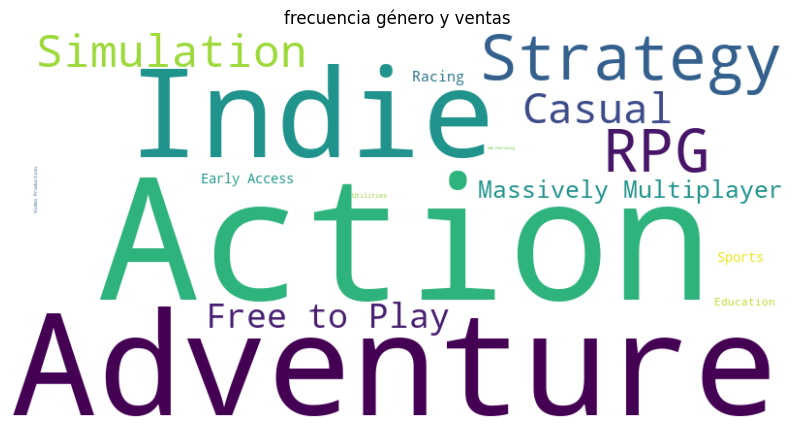

In [55]:
genero_cantidad_ventas = dict(zip(df_generos['Genero'], df_generos['Cantidad_ventas']))
# Crear la wordcloud con los datos
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genero_cantidad_ventas)

# Mostrar la wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('frecuencia género y ventas')
plt.show()

relacion del años de pblicacion de un juego y la cantidad de sus ventas

In [75]:
EDA_games_year = EDA_games.copy()
# Primero, agrupa el dataframe 'nuevo_items' por year y suma las cantidades de ventas y las ventas totales

EDA_games_year = EDA_games_year.groupby('year').agg({'cantidad_ventas': 'sum', 'total_ventas': 'sum'}).reset_index()

# Mostrar el nuevo dataframe 'ventas_por_genero' con las sumas por year
EDA_games_year

,year,cantidad_ventas,total_ventas
0,1970,0.0,0.00
1,1975,0.0,0.00
2,1980,0.0,0.00
3,1981,0.0,0.00
4,1982,0.0,0.00
5,1983,72.0,719.28
6,1984,13.0,129.87
7,1985,0.0,0.00
8,1986,0.0,0.00
9,1987,36.0,311.64


In [77]:
EDA_games_year = EDA_games_year[EDA_games_year['cantidad_ventas'] != 0.0]


eliminacion de nulos 

In [83]:
EDA_games_year.head()

,year,cantidad_ventas,total_ventas
5,1983,72.0,719.28
6,1984,13.0,129.87
9,1987,36.0,311.64
10,1988,287.0,1720.13
11,1989,82.0,520.18


#### visualisacion de ventas por año

<BarContainer object of 34 artists>

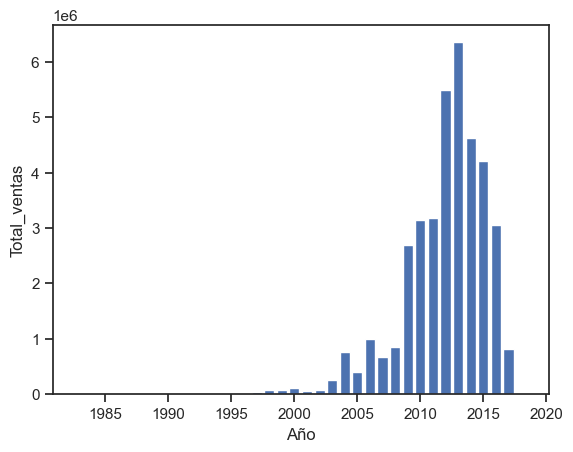

In [103]:
x = EDA_games_year['year'].values
height = EDA_games_year['total_ventas'].values

fig = plt.figure()
ax = plt.axes()
ax.set(xlabel='Año', ylabel='Total_ventas')
plt.bar(x, height, width=0.8, bottom=None,  align='center', data=None)

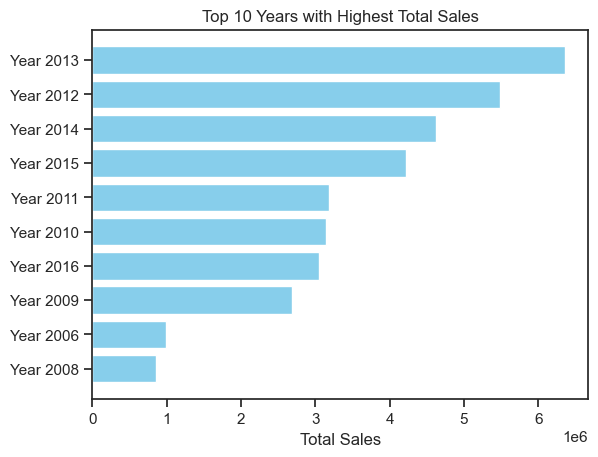

In [105]:
top_10_years = EDA_games_year.nlargest(10, 'total_ventas')

x = top_10_years['year'].values
y = top_10_years['total_ventas'].values

fig, ax = plt.subplots()

# Example data for people
people = ['Year ' + str(year) for year in x]
y_pos = np.arange(len(people))

ax.barh(y_pos, y, align='center', color='skyblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # Invert y-axis to show the highest sales on top
ax.set_xlabel('Total Ventas')
ax.set_title('Top 10 Años con mas Ventas')

plt.show()



### Visualizacion de mejores desarrolladoras

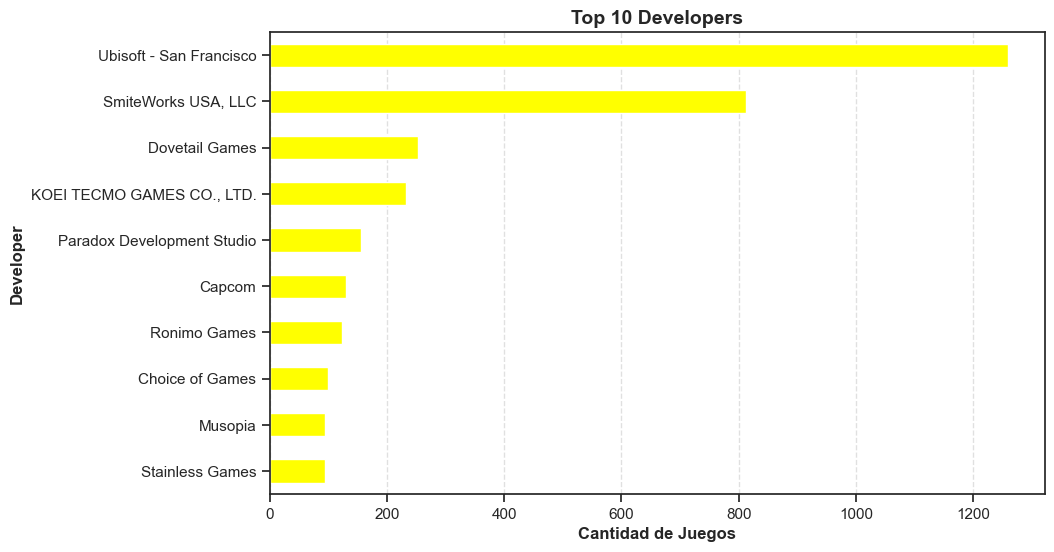

In [107]:
# Contamos la cantidad de juegos por developer
conteo_developer = df_games['developer'].value_counts()

# Creamos una figura solo con un subplot para los developers
plt.figure(figsize=(10, 6))

# Plot para los developers
conteo_developer[:10].sort_values().plot(kind='barh', color='yellow')  # Usar plot horizontal para facilitar la lectura
plt.title('Top 10 Developers', fontsize=14, weight='bold')
plt.xlabel('Cantidad de Juegos', weight='bold')
plt.ylabel('Developer', weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Agregar líneas de cuadrícula para referencia

# Mostramos el gráfico
plt.show()

### Visualizacion de distribución de Precios

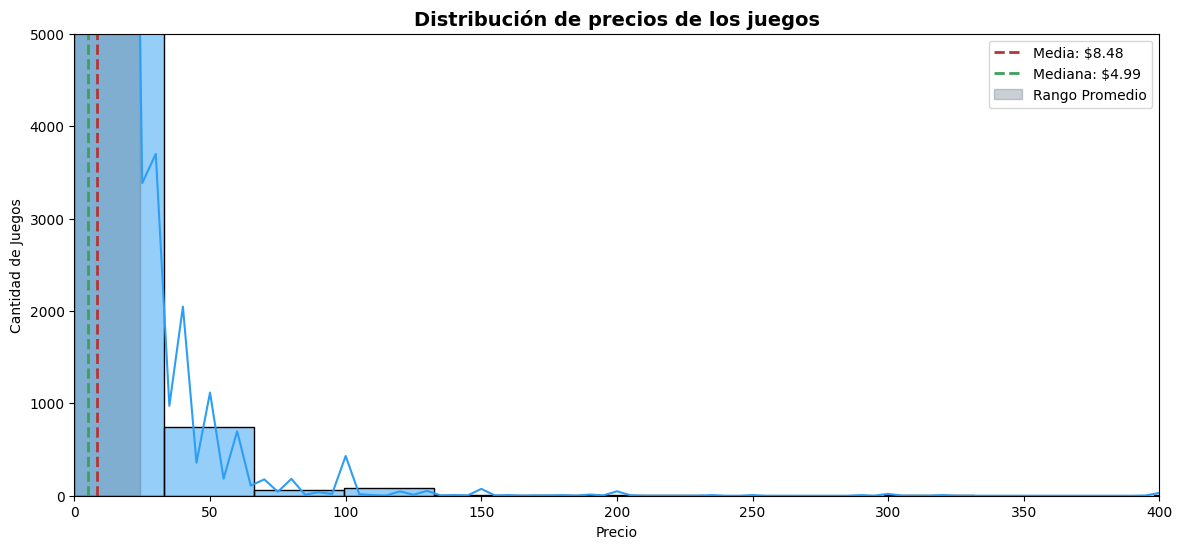

In [6]:
# Obtenemos los precios para cada juego y hacer un DataFrame
precio_unicos = df_games.groupby('item_id')['price'].unique().reset_index().explode('price')
df_precio_unicos = precio_unicos['price']

# Calculamos media y mediana
media = df_precio_unicos.mean()
mediana = df_precio_unicos.median()

# Calculamos porcentajes dentro y fuera del rango promedio
porcentaje_dentro = (df_precio_unicos.between(media - df_precio_unicos.std(), media + df_precio_unicos.std())).sum() / len(df_precio_unicos) * 100
porcentaje_fuera = 100 - porcentaje_dentro

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(14, 6))

# Usamos un histograma para visualizar la distribución de precios
sns.histplot(df_precio_unicos, bins=30, color='#2D9EF5', kde=True)

# Agregamos líneas indicadoras para la media y la mediana
ax.axvline(media, color='#B53535', linestyle='dashed', linewidth=2, label=f'Media: ${media:.2f}')
ax.axvline(mediana, color='#3CA058', linestyle='dashed', linewidth=2, label=f'Mediana: ${mediana:.2f}')

# Agregamos áreas sombreadas para indicar el rango promedio
ax.axvspan(media - df_precio_unicos.std(), media + df_precio_unicos.std(), alpha=0.3, color='#506575', label='Rango Promedio')

# Personalizamos el gráfico
ax.set_xlabel('Precio')
ax.set_ylabel('Cantidad de Juegos')
ax.set_title('Distribución de precios de los juegos', fontsize=14, weight='bold')
ax.legend()  # Mostrar leyenda

# Ajustamos el rango del eje y para enfocarse mejor en la distribución principal
ax.set_ylim(0, 5000)
ax.set_xlim(0,400)

# Mostramos el gráfico
plt.show()

### visualizacoin de los Juegos mas adquiridos

C:\Users\lucas\AppData\Local\Temp\ipykernel_14068\3972158882.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='hours_game', y='name', data=merged_data.groupby('name')['hours_game'].sum().sort_values(ascending=False).head(10).reset_index(), palette='rocket')


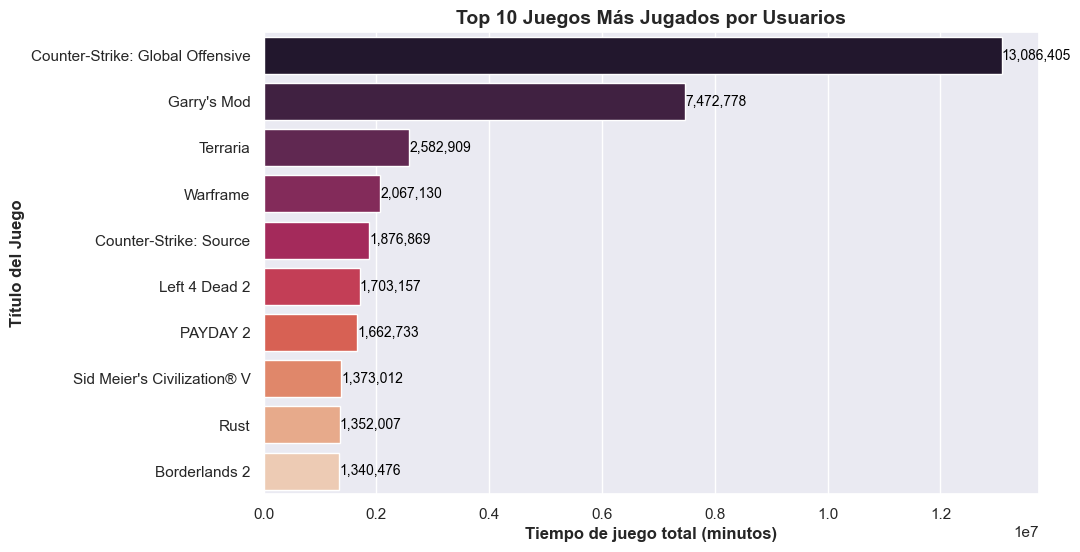

In [7]:
# Join the tables on 'item_id' and 'item_id'
merged_data = pd.merge(df_games, df_items, left_on='item_id', right_on='item_id', how='inner')

# Configurar el estilo de seaborn
sns.set(style='darkgrid')

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='hours_game', y='name', data=merged_data.groupby('name')['hours_game'].sum().sort_values(ascending=False).head(10).reset_index(), palette='rocket')

# Añadir etiquetas de datos a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10, color='black')

# Personalizar el gráfico
ax.set_xlabel('Tiempo de juego total (minutos)', weight='bold')
ax.set_ylabel('Título del Juego', weight='bold')
ax.set_title('Top 10 Juegos Más Jugados por Usuarios', fontsize=14, weight='bold')

# Mostrar el gráfico
plt.show()

EDA REVIEWS
==

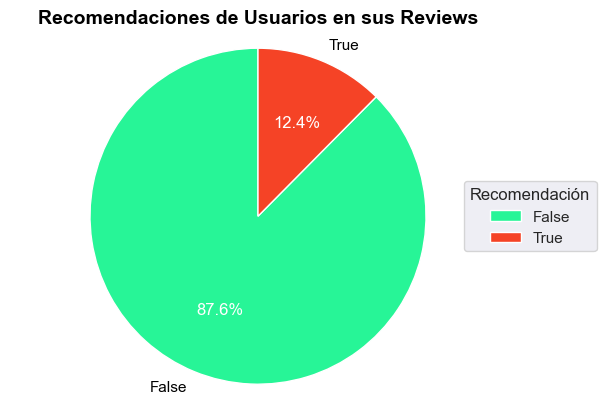

In [8]:
# Agrupamos los valores y ordenamos de menor a mayor
cant_recommend = df_reviews['recommend'].groupby(df_reviews['recommend']).count()
recommend = df_reviews['recommend'].unique()
colores = ["#27F597", "#F54326"]  # Cambié los colores para mejorar el contraste
sorted_cant_recommend, sorted_recommend = zip(*sorted(zip(cant_recommend, recommend), reverse=True))

# Creamos el gráfico de pie
fig, piechart_3 = plt.subplots()
wedges, _, autopcts = piechart_3.pie(sorted_cant_recommend, labels=sorted_recommend, autopct='%1.1f%%', colors=colores, startangle=90, textprops={'color': 'black'}, pctdistance=0.6, labeldistance=1.1)

# Cambiamos el color del porcentaje para que sea más legible
for autopct in autopcts:
    autopct.set_color('white')

# Añadimos leyenda
piechart_3.legend(wedges, sorted_recommend, title="Recomendación", loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))

# Ajustamos el aspecto del gráfico, para que el gráfico de pie sea circular y no se deforme
piechart_3.axis('equal')

# Agregamos título
piechart_3.set_title('Recomendaciones de Usuarios en sus Reviews', color='black', fontsize=14, weight='bold')

# Mostramos el gráfico
plt.show()